In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import shap
import warnings
warnings.filterwarnings("ignore")

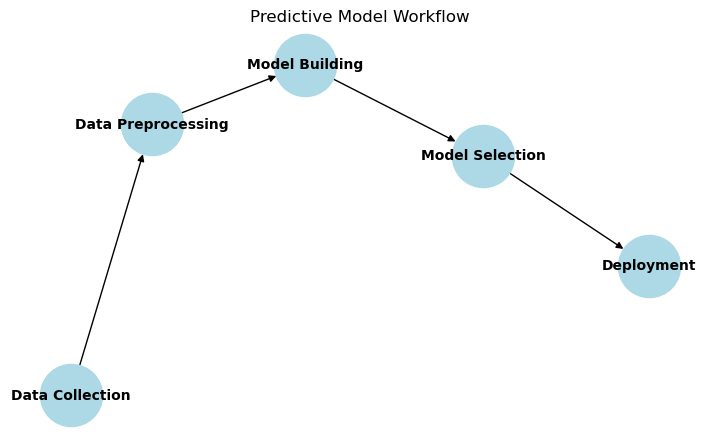

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

# Define steps in the model workflow
steps = [
    ("Data Collection", "Data Preprocessing"),
    ("Data Preprocessing", "Model Building"),
    ("Model Building", "Model Selection"),
    ("Model Selection", "Deployment")
]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(steps)

# Draw the workflow
plt.figure(figsize=(7, 4))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
plt.title("Predictive Model Workflow")
plt.show()

In [71]:
#Read Dataset
df = pd.read_csv('D:/MS/Final_Submission/Project_work/Bank_Customer_Churn_Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [73]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [74]:
# Drop irrelevant column
df.drop(['customer_id'], axis=1, inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

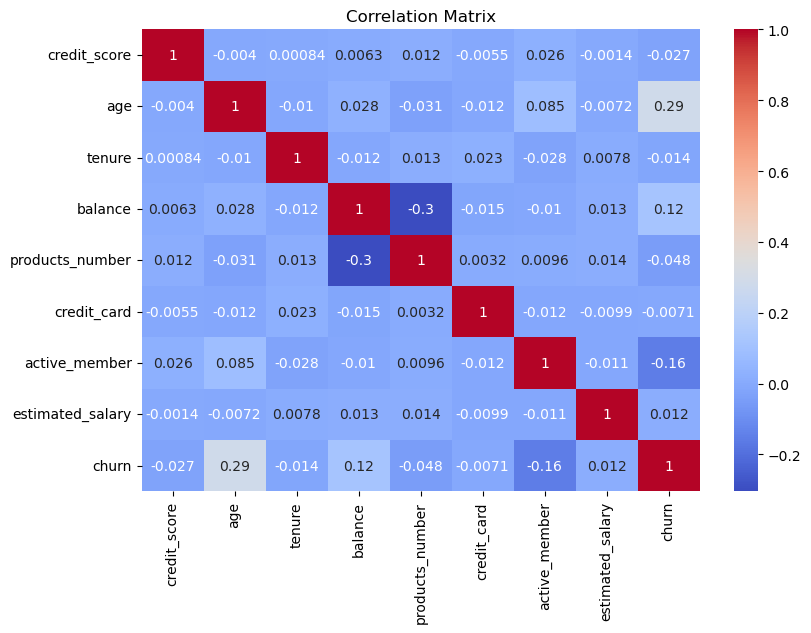

In [76]:
# Correlation matrix
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [77]:
# Unique values in categorical features
print("Unique values in categorical columns:")
print(df[['country', 'gender']].apply(lambda col: col.unique()))

Unique values in categorical columns:
country    [France, Spain, Germany]
gender               [Female, Male]
dtype: object


In [78]:
# Distribution of numerical features
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
print("Summary of Numerical Features:\n", df[numerical_features].describe())

Summary of Numerical Features:
        credit_score           age        tenure        balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       products_number  estimated_salary  
count     10000.000000      10000.000000  
mean          1.530200     100090.239881  
std           0.581654      57510.492818  
min           1.000000         11.580000  
25%           1.000000      51002.110000  
50%           1.000000     100193.915000  
75%           2.000000     149388.247500  
max           4.000000     19

In [79]:
# Distribution of categorical features
categorical_features = ['country', 'gender', 'credit_card', 'active_member']
print("Summary of Categorical Features:")
for feature in categorical_features:
    print(f"\n{feature} value counts:\n", df[feature].value_counts())

Summary of Categorical Features:

country value counts:
 France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

gender value counts:
 Male      5457
Female    4543
Name: gender, dtype: int64

credit_card value counts:
 1    7055
0    2945
Name: credit_card, dtype: int64

active_member value counts:
 1    5151
0    4849
Name: active_member, dtype: int64


In [80]:
# Check column names to confirm the target variable
print(df.columns)

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')


Target variable distribution (churn):
0    0.7963
1    0.2037
Name: churn, dtype: float64


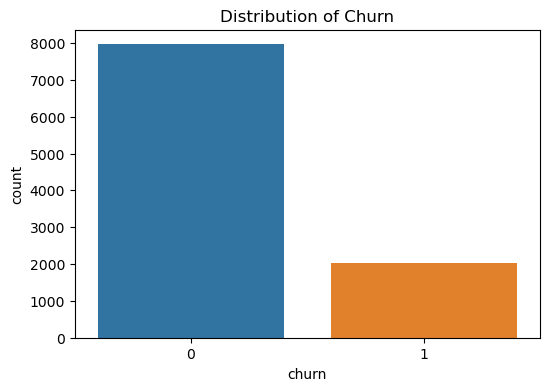

In [81]:
# Check the distribution of the target variable
print("Target variable distribution (churn):")
print(df['churn'].value_counts(normalize=True))

# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title("Distribution of Churn")
plt.show()

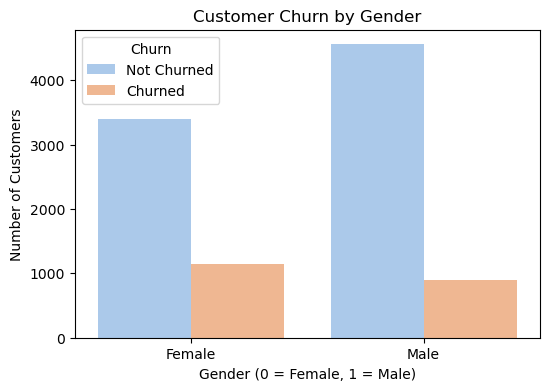

In [82]:
# Bar Chart for Churn by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='churn', data=df, palette='pastel')
plt.title('Customer Churn by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

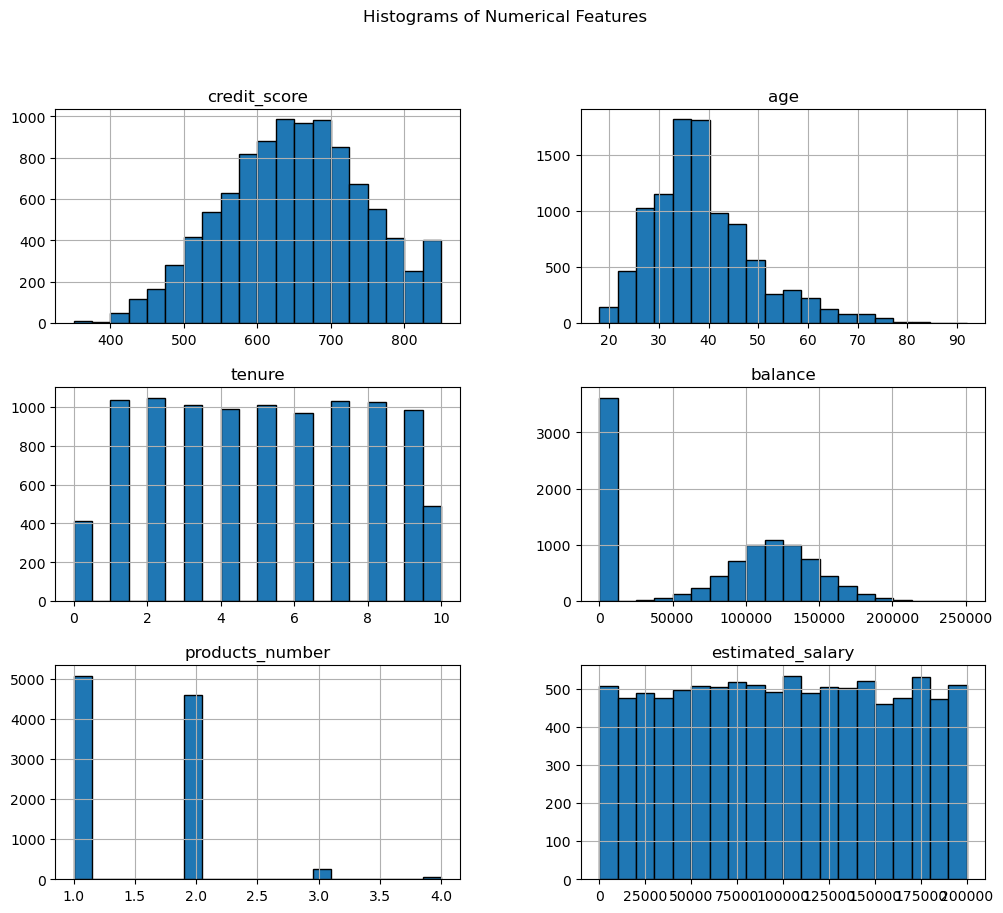

In [83]:
# Histograms of numerical features
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
df[numerical_features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

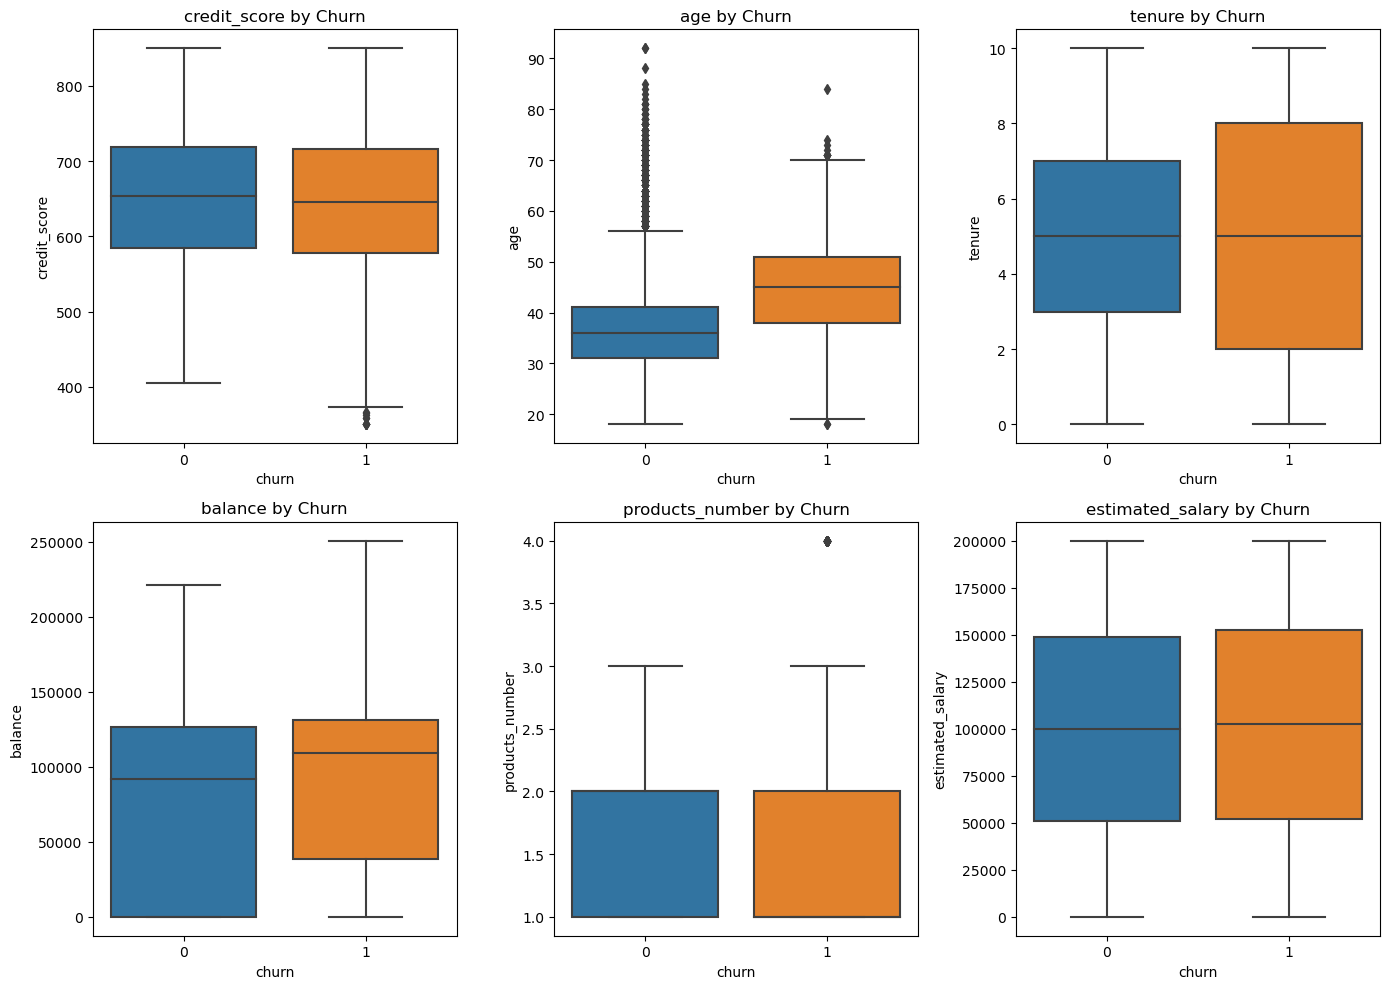

In [84]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f"{feature} by Churn")
plt.tight_layout()
plt.show()

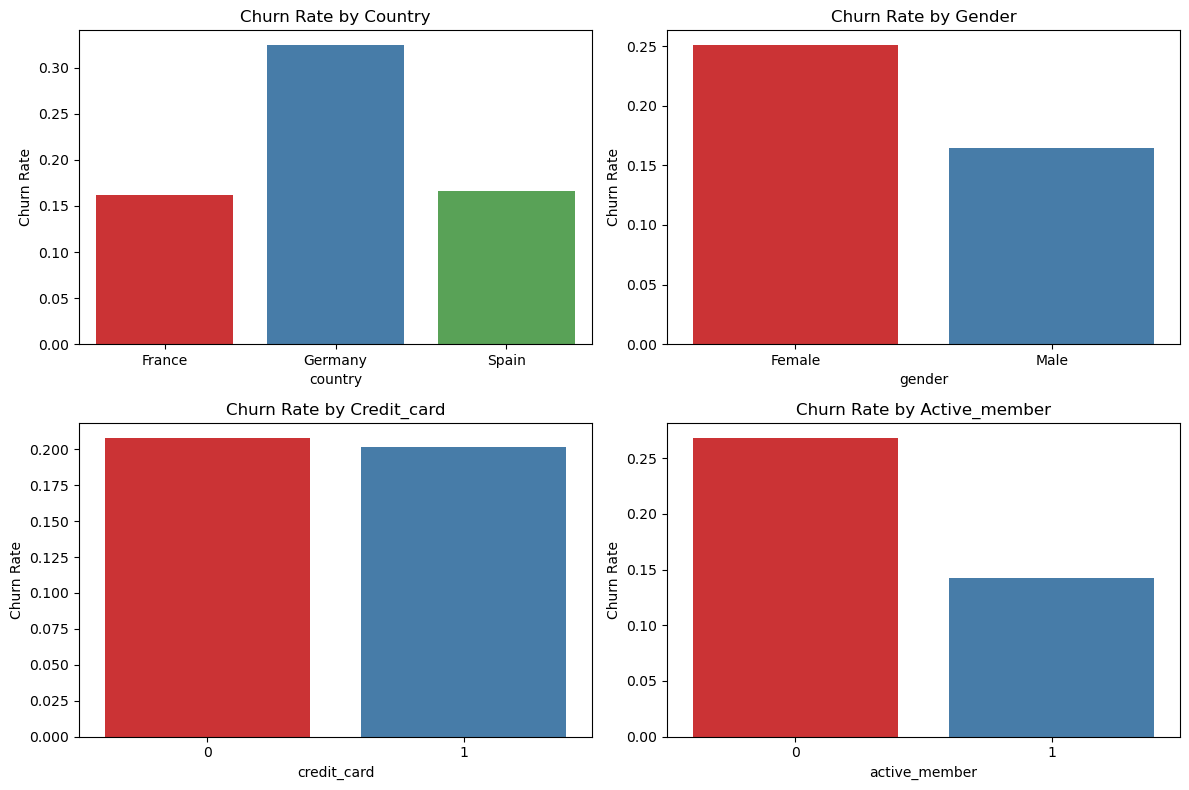

In [85]:
# Define key categorical features
categorical_features = ['country', 'gender', 'credit_card', 'active_member']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    churn_rate = df.groupby(feature)['churn'].mean()
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="Set1")
    plt.title(f"Churn Rate by {feature.capitalize()}")
    plt.ylabel("Churn Rate")
plt.tight_layout()
plt.show()

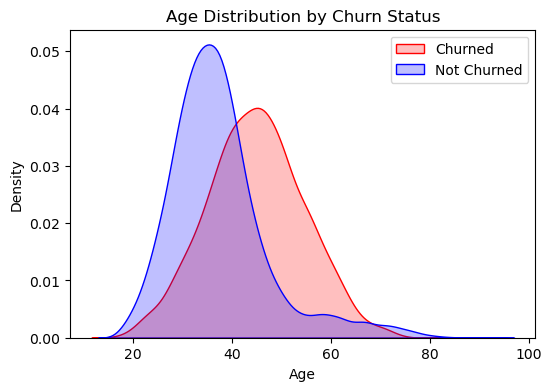

In [86]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df[df['churn'] == 1]['age'], shade=True, color="red", label="Churned")
sns.kdeplot(df[df['churn'] == 0]['age'], shade=True, color="blue", label="Not Churned")
plt.title("Age Distribution by Churn Status")
plt.xlabel("Age")
plt.legend()
plt.show()

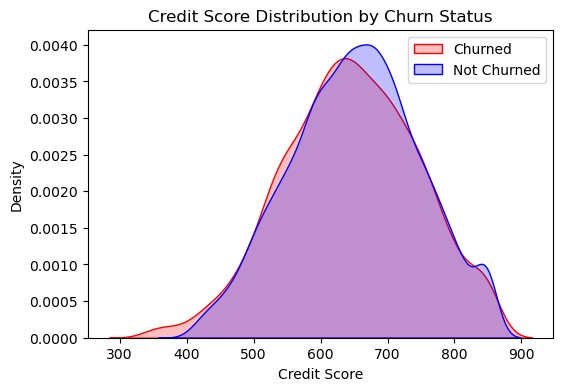

In [87]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df[df['churn'] == 1]['credit_score'], shade=True, color="red", label="Churned")
sns.kdeplot(df[df['churn'] == 0]['credit_score'], shade=True, color="blue", label="Not Churned")
plt.title("Credit Score Distribution by Churn Status")
plt.xlabel("Credit Score")
plt.legend()
plt.show()

In [88]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


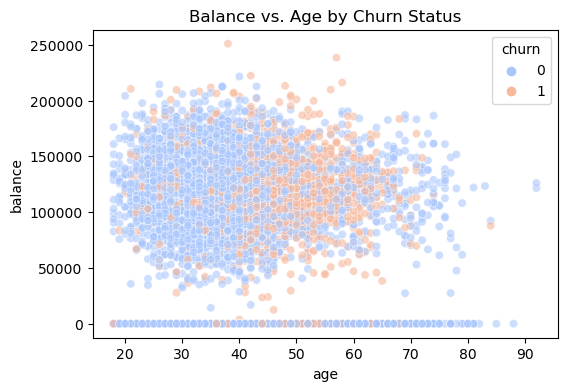

In [89]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='balance', hue='churn', data=df, palette='coolwarm', alpha=0.6)
plt.title("Balance vs. Age by Churn Status")
plt.show()

In [90]:
# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# One-hot encoding for country
df = pd.get_dummies(df, columns=['country'])

In [91]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [92]:
# Define features and target
X = df.drop('churn', axis=1)
y = df['churn']

In [93]:
# Scale numerical features
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [94]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [95]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

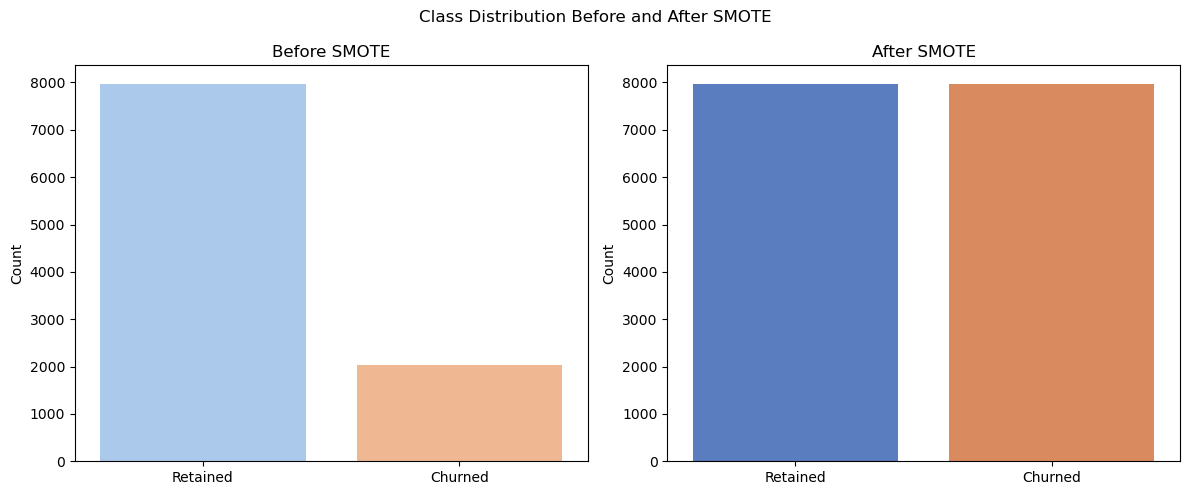

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Simulated class distribution before and after SMOTE for visualization
original_counts = Counter({'Churned': 2037, 'Retained': 7963})
balanced_counts = Counter({'Churned': 7963, 'Retained': 7963})

# Prepare data for plotting
labels = ['Retained', 'Churned']
before = [original_counts['Retained'], original_counts['Churned']]
after = [balanced_counts['Retained'], balanced_counts['Churned']]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=labels, y=before, ax=axes[0], palette='pastel')
axes[0].set_title('Before SMOTE')
axes[0].set_ylabel('Count')

sns.barplot(x=labels, y=after, ax=axes[1], palette='muted')
axes[1].set_title('After SMOTE')
axes[1].set_ylabel('Count')

plt.suptitle('Class Distribution Before and After SMOTE')
plt.tight_layout()
plt.show()


Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1593
           1       0.40      0.66      0.50       407

    accuracy                           0.73      2000
   macro avg       0.65      0.70      0.66      2000
weighted avg       0.79      0.73      0.75      2000

Confusion Matrix:
 [[1191  402]
 [ 140  267]]
ROC AUC Score: 0.7686561754358364

SHAP summary for Logistic Regression:


  0%|          | 0/100 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

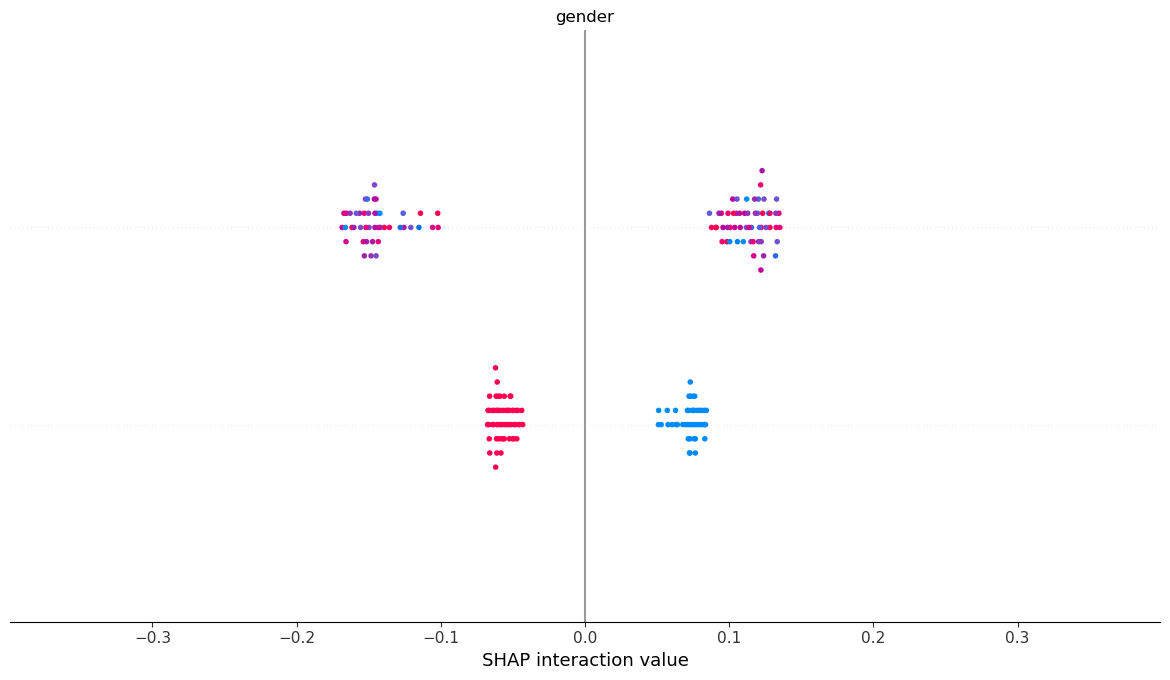


Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.60      0.60      0.60       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix:
 [[1432  161]
 [ 164  243]]
ROC AUC Score: 0.8506657659200032

SHAP summary for Random Forest:


<Figure size 640x480 with 0 Axes>

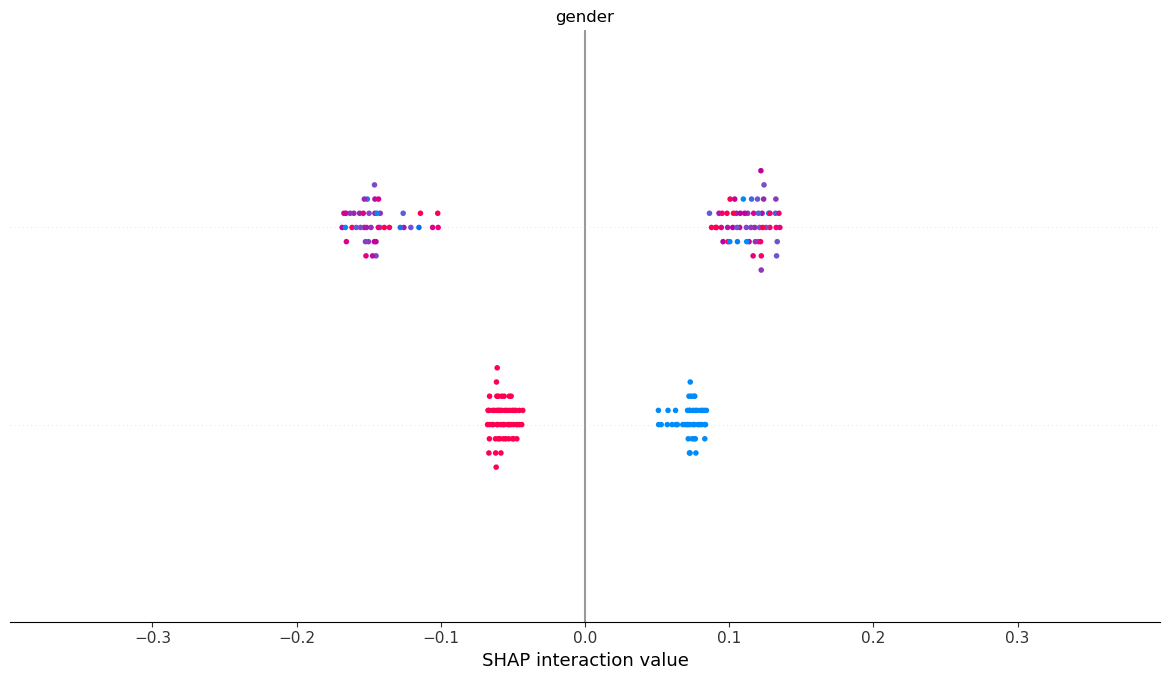


XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1593
           1       0.64      0.57      0.60       407

    accuracy                           0.85      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000

Confusion Matrix:
 [[1461  132]
 [ 176  231]]
ROC AUC Score: 0.8397349583790261

SHAP summary for XGBoost:


<Figure size 640x480 with 0 Axes>

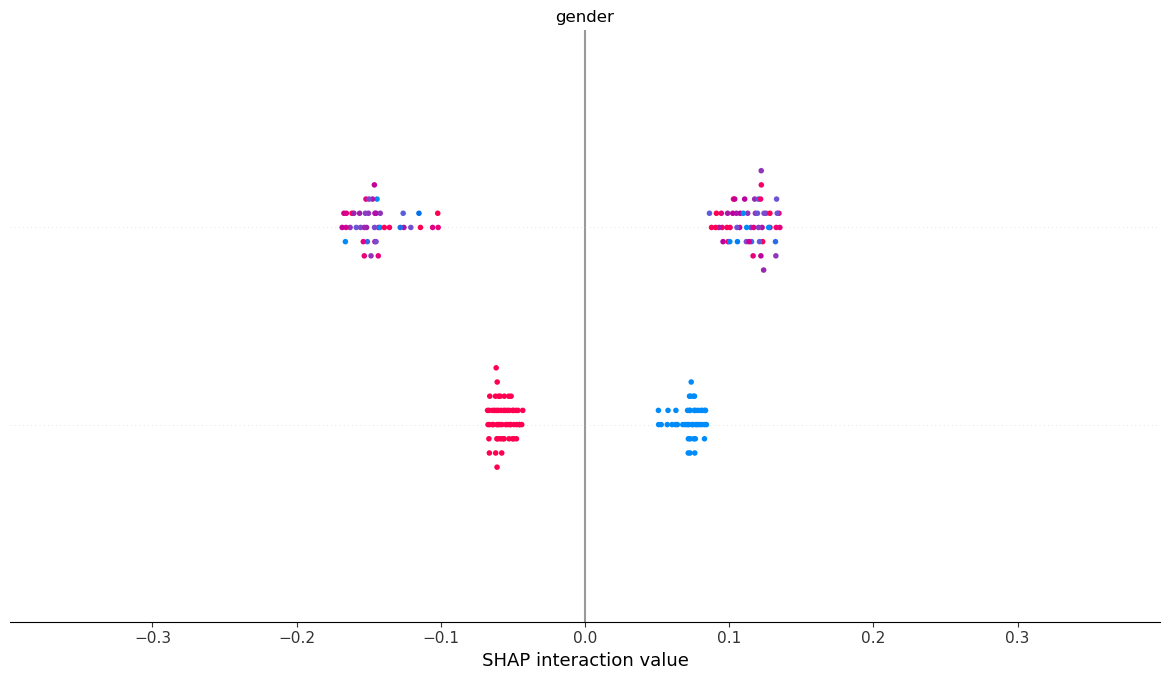

In [97]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train, predict, and evaluate
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    # SHAP explainability
    print(f"\nSHAP summary for {name}:")
    if name == 'Logistic Regression':
        X_sample = shap.sample(X_test, 100, random_state=42)
        explainer = shap.KernelExplainer(model.predict_proba, X_sample)
        shap_values = explainer.shap_values(X_sample)

    # Handle list or array output
    if isinstance(shap_values, list) and len(shap_values) == 2:
        shap.summary_plot(shap_values[1], X_sample, feature_names=X.columns)
    else:
        shap.summary_plot(shap_values, X_sample, feature_names=X.columns)

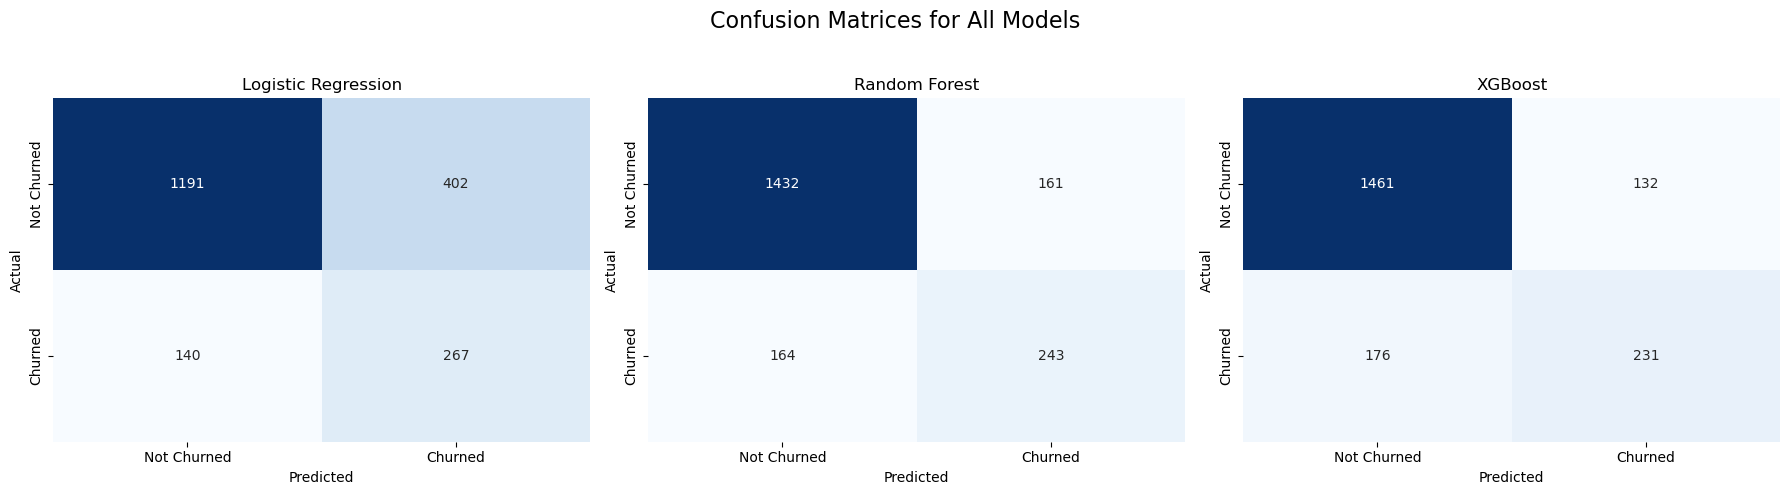

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Store predictions
predictions = {name: model.predict(X_test) for name, model in models.items()}

# Create subplots for side-by-side confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'],
                ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.suptitle('Confusion Matrices for All Models', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

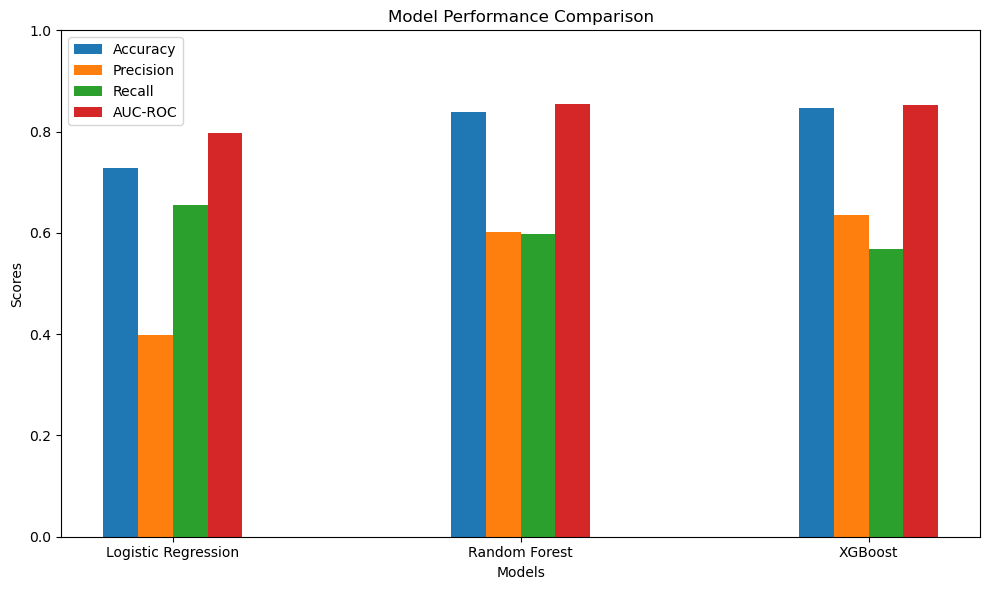

In [99]:
# Re-import necessary libraries after code state reset
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

#Updated metrics based on confusion matrices and reports
accuracy = [0.729, 0.838, 0.846]
precision = [0.399, 0.601, 0.636]
recall = [0.656, 0.597, 0.568]
auc_roc = [0.798, 0.854, 0.852]

#Set position of bars on X-axis
x = np.arange(len(models))
width = 0.1

#Plot
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5 * width, precision, width, label='Precision')
plt.bar(x + 0.5 * width, recall, width, label='Recall')
plt.bar(x + 1.5 * width, auc_roc, width, label='AUC-ROC')

#Labels and formatting
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

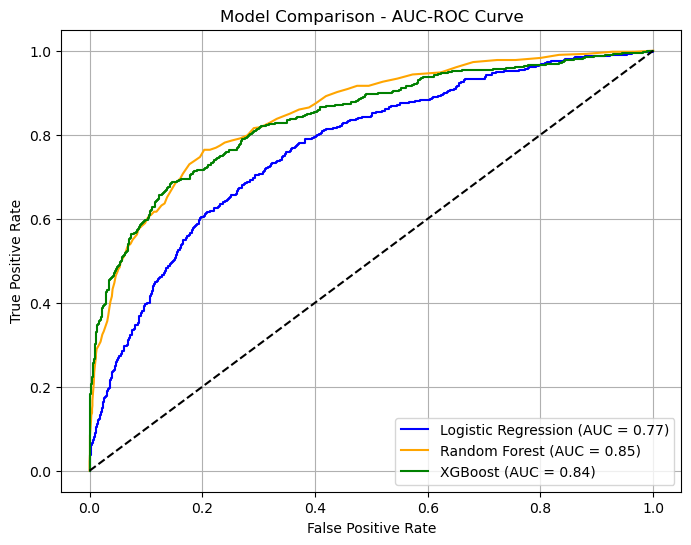

In [102]:
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')  # Set axes background to white

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='orange')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Comparison - AUC-ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()